In [1]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns


In [2]:
#loading the dataset
df_2022 = pd.read_csv('Dhaka_PM2.5_2022.csv')
df_2021 = pd.read_csv('Dhaka_PM2.5_2021.csv')
df_2020 = pd.read_csv('Dhaka_PM2.5_2020.csv')

In [3]:
#concatenating for further use
df = pd.concat([df_2022,df_2021,df_2020])
df.head()

,Date (LT),Hour,NowCast Conc.,Raw Conc.,Conc. Unit,AQI,AQI Category,QC Name
0,01/01/2022 02:00,2,130.1,129,ug/m3,190,Unhealthy,Valid
1,01/01/2022 03:00,3,128.1,126,ug/m3,188,Unhealthy,Valid
2,01/01/2022 04:00,4,125.1,121,ug/m3,187,Unhealthy,Valid
3,01/01/2022 05:00,5,125.6,126,ug/m3,187,Unhealthy,Valid
4,01/01/2022 06:00,6,124.2,120,ug/m3,186,Unhealthy,Valid


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20420 entries, 0 to 8536
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date (LT)      20420 non-null  object 
 1   Hour           20420 non-null  int64  
 2   NowCast Conc.  20420 non-null  float64
 3   Raw Conc.      20420 non-null  int64  
 4   Conc. Unit     20420 non-null  object 
 5   AQI            20420 non-null  int64  
 6   AQI Category   20373 non-null  object 
 7   QC Name        20420 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 1.4+ MB


## Data cleaning & wrangling


In [5]:
df.columns= df.columns.str.lower()

In [6]:
df.columns = df.columns.str.replace(' ', '_')

In [7]:
df.head()

,date_(lt),hour,nowcast_conc.,raw_conc.,conc._unit,aqi,aqi_category,qc_name
0,01/01/2022 02:00,2,130.1,129,ug/m3,190,Unhealthy,Valid
1,01/01/2022 03:00,3,128.1,126,ug/m3,188,Unhealthy,Valid
2,01/01/2022 04:00,4,125.1,121,ug/m3,187,Unhealthy,Valid
3,01/01/2022 05:00,5,125.6,126,ug/m3,187,Unhealthy,Valid
4,01/01/2022 06:00,6,124.2,120,ug/m3,186,Unhealthy,Valid


In [8]:
df.rename(columns={'date_(lt)': 'date'}, inplace=True)
df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y %H:%M')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20420 entries, 0 to 8536
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           20420 non-null  datetime64[ns]
 1   hour           20420 non-null  int64         
 2   nowcast_conc.  20420 non-null  float64       
 3   raw_conc.      20420 non-null  int64         
 4   conc._unit     20420 non-null  object        
 5   aqi            20420 non-null  int64         
 6   aqi_category   20373 non-null  object        
 7   qc_name        20420 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 1.4+ MB


converted to date time

In [10]:
df.isnull().sum()

date              0
hour              0
nowcast_conc.     0
raw_conc.         0
conc._unit        0
aqi               0
aqi_category     47
qc_name           0
dtype: int64

In [11]:
df['aqi_category'].fillna('Unknown', inplace=True)

In [12]:
df.isnull().sum()

date             0
hour             0
nowcast_conc.    0
raw_conc.        0
conc._unit       0
aqi              0
aqi_category     0
qc_name          0
dtype: int64

looks good

In [13]:
df.columns

Index(['date', 'hour', 'nowcast_conc.', 'raw_conc.', 'conc._unit', 'aqi',
       'aqi_category', 'qc_name'],
      dtype='object')

In [14]:
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.head()

,date,hour,nowcast_conc.,raw_conc.,conc._unit,aqi,aqi_category,qc_name,month,day
0,2022-01-01 02:00:00,2,130.1,129,ug/m3,190,Unhealthy,Valid,1,1
1,2022-01-01 03:00:00,3,128.1,126,ug/m3,188,Unhealthy,Valid,1,1
2,2022-01-01 04:00:00,4,125.1,121,ug/m3,187,Unhealthy,Valid,1,1
3,2022-01-01 05:00:00,5,125.6,126,ug/m3,187,Unhealthy,Valid,1,1
4,2022-01-01 06:00:00,6,124.2,120,ug/m3,186,Unhealthy,Valid,1,1


## Feature Engineering

In [15]:
df.head()

,date,hour,nowcast_conc.,raw_conc.,conc._unit,aqi,aqi_category,qc_name,month,day
0,2022-01-01 02:00:00,2,130.1,129,ug/m3,190,Unhealthy,Valid,1,1
1,2022-01-01 03:00:00,3,128.1,126,ug/m3,188,Unhealthy,Valid,1,1
2,2022-01-01 04:00:00,4,125.1,121,ug/m3,187,Unhealthy,Valid,1,1
3,2022-01-01 05:00:00,5,125.6,126,ug/m3,187,Unhealthy,Valid,1,1
4,2022-01-01 06:00:00,6,124.2,120,ug/m3,186,Unhealthy,Valid,1,1


In [16]:
df.drop(columns = 'qc_name', inplace = True)

**Label encoding of our target label**

Since, its an ordinal category so we have to label encode it

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
LE = LabelEncoder()

In [19]:
df['aqi_le'] = LE.fit_transform(df['aqi_category'])

In [20]:
df.head()

,date,hour,nowcast_conc.,raw_conc.,conc._unit,aqi,aqi_category,month,day,aqi_le
0,2022-01-01 02:00:00,2,130.1,129,ug/m3,190,Unhealthy,1,1,3
1,2022-01-01 03:00:00,3,128.1,126,ug/m3,188,Unhealthy,1,1,3
2,2022-01-01 04:00:00,4,125.1,121,ug/m3,187,Unhealthy,1,1,3
3,2022-01-01 05:00:00,5,125.6,126,ug/m3,187,Unhealthy,1,1,3
4,2022-01-01 06:00:00,6,124.2,120,ug/m3,186,Unhealthy,1,1,3


In [21]:
main_df = df.drop(columns= ['date','conc._unit'])

In [22]:
main_df['aqi_category'].unique()

array(['Unhealthy', 'Very Unhealthy', 'Hazardous', 'Unknown',
       'Unhealthy for Sensitive Groups', 'Moderate', 'Good'], dtype=object)

In [23]:
main_df['aqi_le'].unique()

array([3, 6, 1, 5, 4, 2, 0])

The Label Encoding is a bit confusing on setting the ranks here so, I'll manually map it

In [24]:
# Defining the mapping of numerical values to AQI categories
aqi_ranking = {
'Hazardous': 6,
'Very Unhealthy': 5,
'Unhealthy for Sensitive Groups': 4,
'Unhealthy': 3,
'Moderate': 2,
'Good': 1,
'Unknown': 0
}

# Create the new column 'aqi_map' and map the numerical values to AQI categories
main_df['aqi_map'] = main_df['aqi_category'].replace(aqi_ranking)
main_df[12:100:12]

,hour,nowcast_conc.,raw_conc.,aqi,aqi_category,month,day,aqi_le,aqi_map
12,14,107.1,90,178,Unhealthy,1,1,3,3
24,2,140.8,135,195,Unhealthy,1,2,3,3
36,14,194.4,192,245,Very Unhealthy,1,2,6,5
48,2,221.0,195,271,Very Unhealthy,1,3,6,5
60,14,153.5,117,204,Very Unhealthy,1,3,6,5
72,2,204.7,201,255,Very Unhealthy,1,4,6,5
84,14,199.8,189,250,Very Unhealthy,1,4,6,5
96,2,218.2,208,268,Very Unhealthy,1,5,6,5


In [25]:
main_df = main_df.drop(columns = ['aqi_le', 'aqi_category'])
main_df

,hour,nowcast_conc.,raw_conc.,aqi,month,day,aqi_map
0,2,130.1,129,190,1,1,3
1,3,128.1,126,188,1,1,3
2,4,125.1,121,187,1,1,3
3,5,125.6,126,187,1,1,3
4,6,124.2,120,186,1,1,3
...,...,...,...,...,...,...,...
8532,20,169.2,190,220,12,31,5
8533,21,182.1,195,232,12,31,5
8534,22,195.5,209,246,12,31,5
8535,23,210.7,226,261,12,31,5


## Feature Selection

I'll use some of the methods to select the features that would provide the best patterns or insights. These would be:
- Correlation
- RFECV

1. **Correlation**

In [26]:
X= main_df.drop(columns = ['aqi_map'])
y = main_df['aqi_map']

<AxesSubplot: >

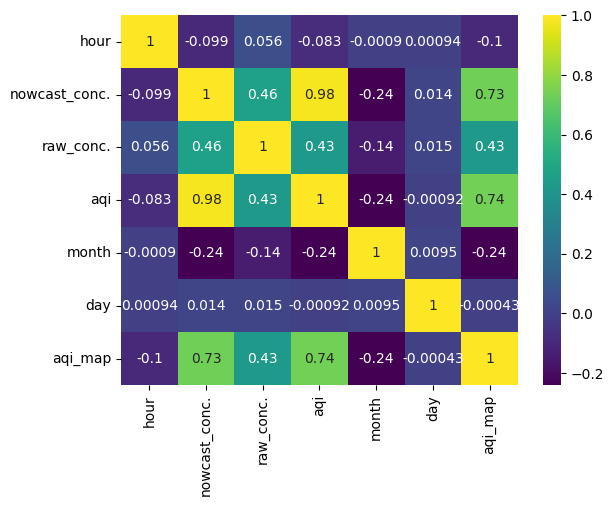

In [27]:
sns.heatmap(main_df.corr(),annot =True, cmap = 'viridis')

Here, the columns = **'nowcast_conc.'**, **'aqi**', **'raw_conc.'** could be chosen as our selected features

2. **RFECV**

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import r2_score

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [30]:
rfr = RandomForestRegressor()

In [31]:
rfecv = RFECV(estimator = rfr, cv=5, scoring = 'r2')

In [32]:
rfecv.fit(X_train, y_train)

RFECV(cv=5, estimator=RandomForestRegressor(), scoring='r2')

After running the RFECV with these parameters, it will perform **recursive feature elimination with cross-validation**, iteratively **removing** the **least** important **features based on the RandomForestRegressor's evaluation** and **select** the **best subset of features** for the given regression problem. The RFECV object will store the results, and  can access them using its attributes such as support_, ranking_, and grid_scores_.

In [33]:
selected_features = X_train.columns[rfecv.support_]
selected_features

Index(['nowcast_conc.', 'aqi', 'month', 'day'], dtype='object')

In [34]:
#Ensembling
# Train the RandomForestRegressor on the selected features
rfr.fit(X_train[selected_features], y_train)

#finally predict on test data
y_pred = rfr.predict(X_test[selected_features])

In [35]:
r2_score(y_test,y_pred)

0.9999998348265452

In this case, an R2 score of 0.999858526156685 is very close to 1, which means that my regression model is an excellent fit for the data. It explains approximately 99.998% of the variance in the dependent variable, indicating that the model can almost perfectly predict the target variable.

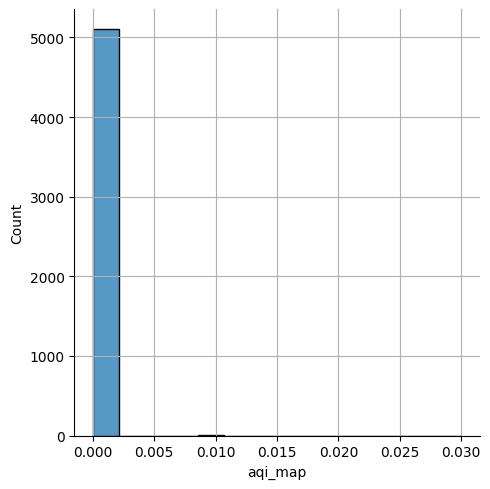

In [36]:
#plotting
import matplotlib.pyplot as plt
sns.displot(y_test-y_pred)
plt.grid(True)
plt.savefig('fig-2.png')

## Pickling

In [37]:
import pickle

with open('BDaqi.pkl', 'wb') as f:
    pickle.dump(rfr, f)
#loading the file
with open('BDaqi.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [38]:
X.shape

(20420, 6)

In [39]:
X[selected_features]

,nowcast_conc.,aqi,month,day
0,130.1,190,1,1
1,128.1,188,1,1
2,125.1,187,1,1
3,125.6,187,1,1
4,124.2,186,1,1
...,...,...,...,...
8532,169.2,220,12,31
8533,182.1,232,12,31
8534,195.5,246,12,31
8535,210.7,261,12,31


In [40]:
y


0       3
1       3
2       3
3       3
4       3
       ..
8532    5
8533    5
8534    5
8535    5
8536    5
Name: aqi_map, Length: 20420, dtype: int64